In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import statsmodels.api as sm

In [3]:
df=pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## 1) Check features and observe data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## 2) Check Assuptions of linearity

### 1) Linearity

In [6]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [ ]:
plt.figure(figsize=(20,20))
sns.pairplot(df)

<Axes: >

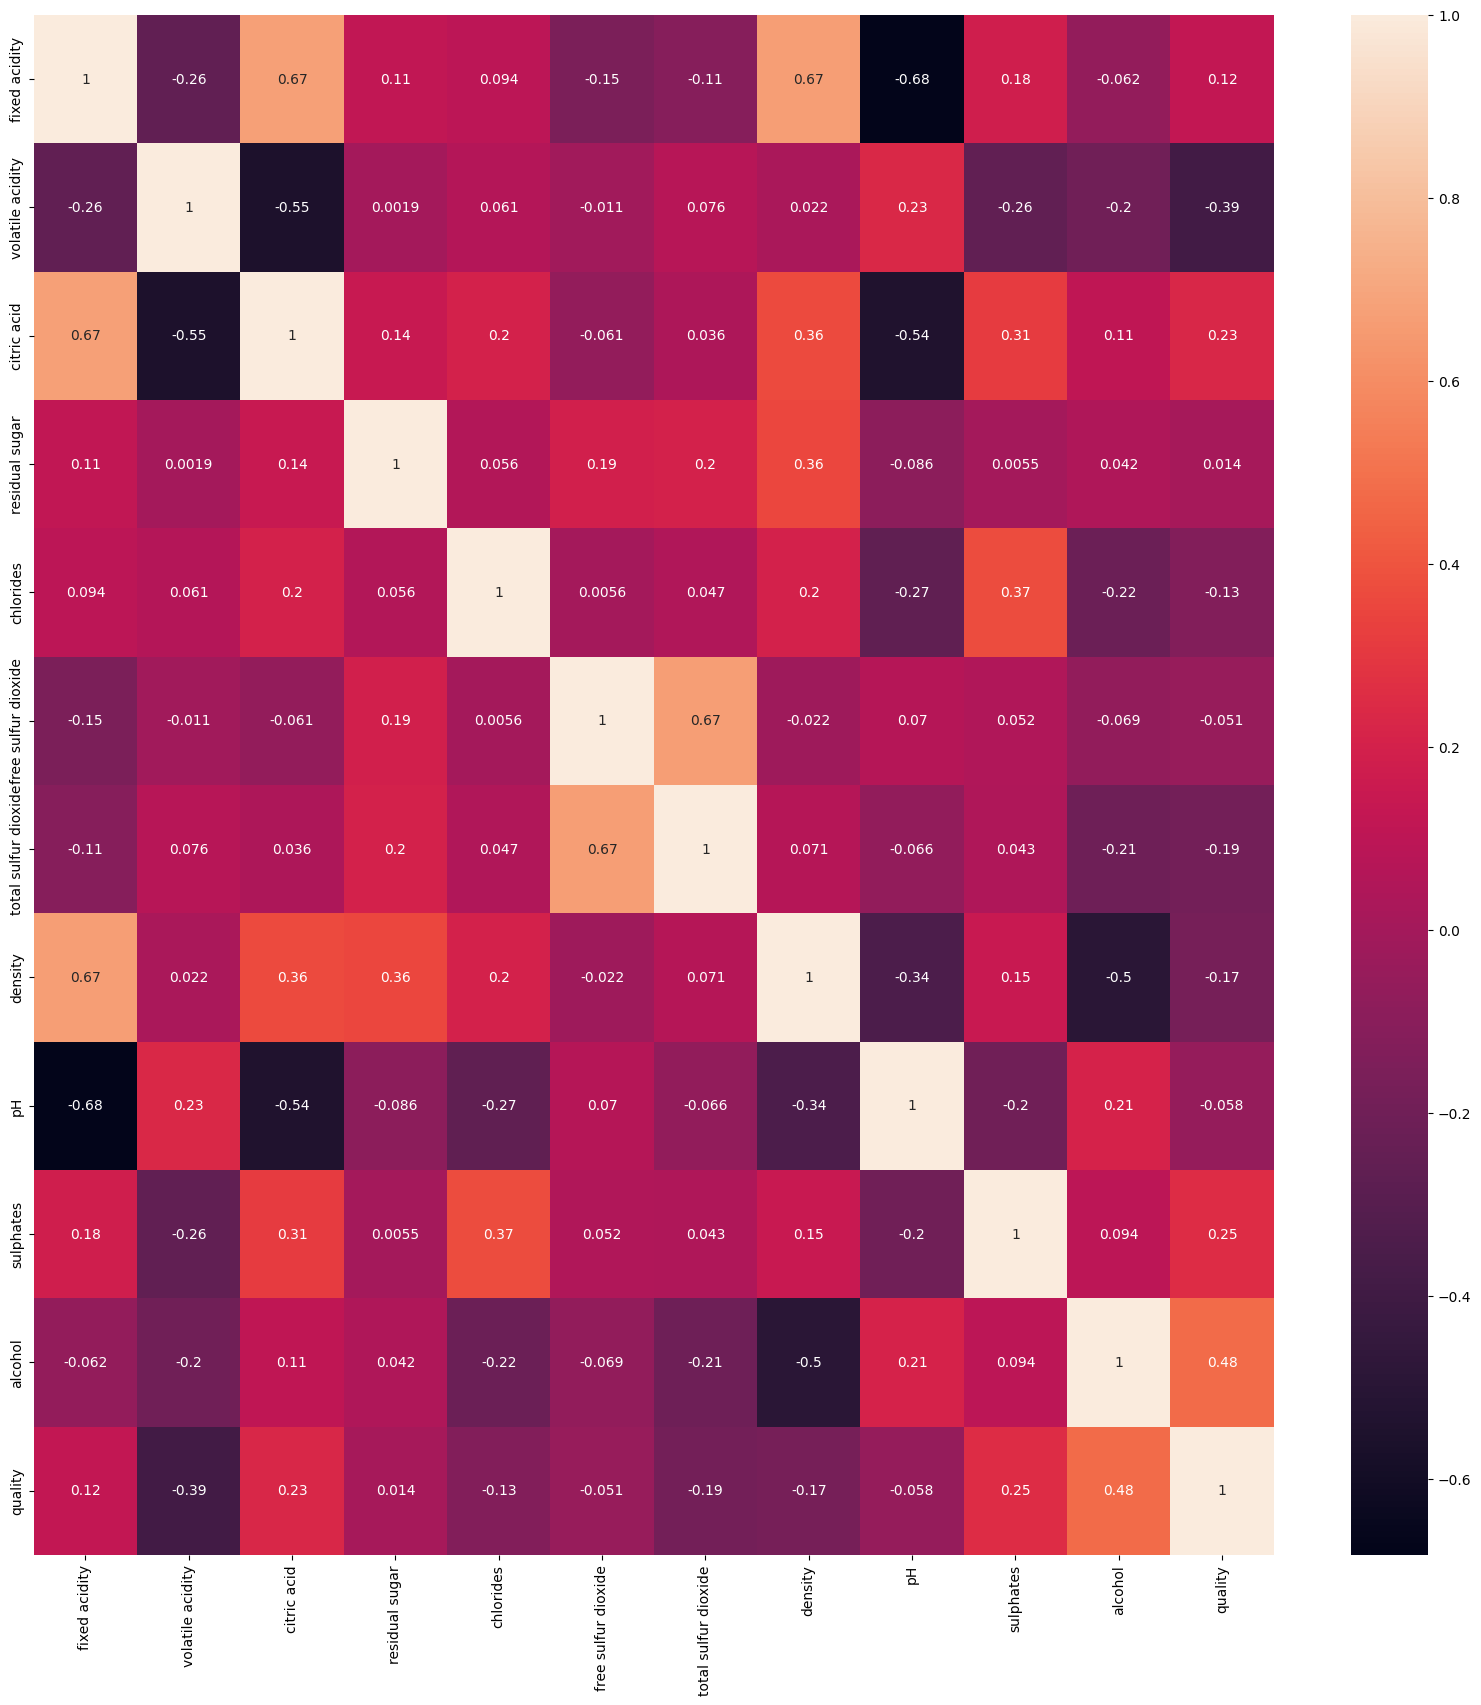

In [6]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

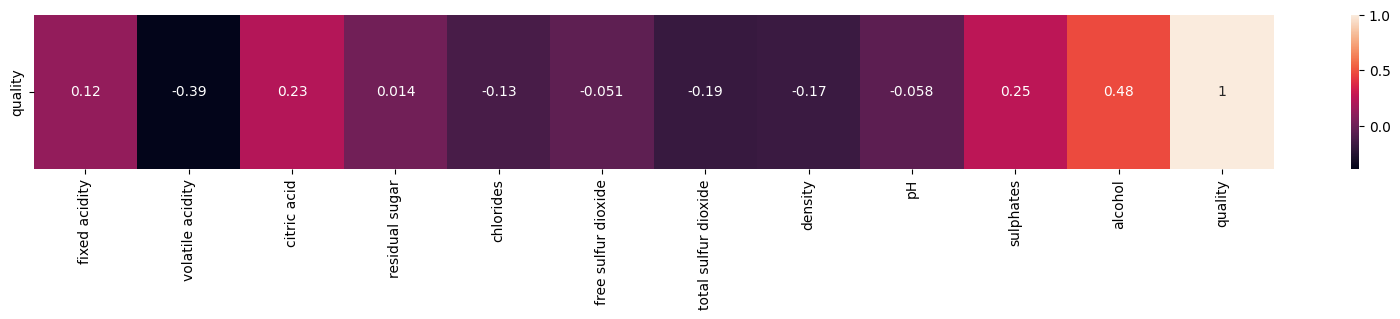

In [7]:
plt.figure(figsize = (20,2))
sns.heatmap(df.corr().tail(1), annot = True)
plt.savefig('Corr.png')

## Split Dataset into Features and Target column.

In [8]:
x = df.drop('quality', axis = 1)  # 'x' contains featurs (independent feature)
y = df['quality']                 # 'y' contains target column (dependent feature)

## 2)No Multicolinearity

In [9]:
x.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [10]:
vif_list = [variance_inflation_factor(x.to_numpy(), i) for i in range(x.shape[1])]
vif_values = pd.Series(vif_list, index = x.columns)
vif_values

fixed acidity             74.452265
volatile acidity          17.060026
citric acid                9.183495
residual sugar             4.662992
chlorides                  6.554877
free sulfur dioxide        6.442682
total sulfur dioxide       6.519699
density                 1479.287209
pH                      1070.967685
sulphates                 21.590621
alcohol                  124.394866
dtype: float64

<Axes: >

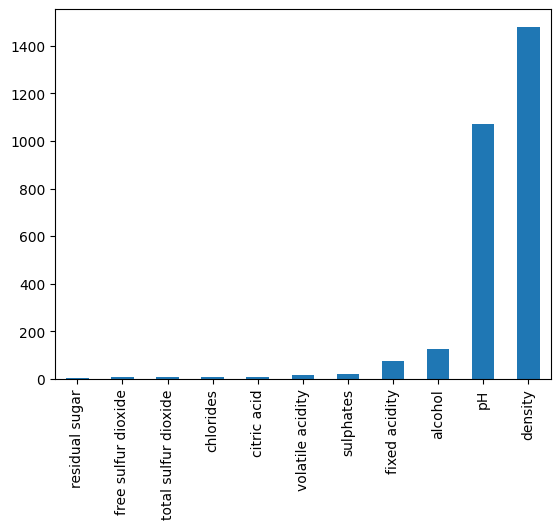

In [11]:
vif_values.sort_values().plot(kind = 'bar')

In [12]:
x = df.drop(['quality','density'], axis = 1)  # Dropping the column 'density' as it has high VIF-> high multicolinearity

## 3) Model Training

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2,
                                                   random_state = 11)


### Instantiating Linear Regression model

In [18]:
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train) # Training of Lienar Regression Model
# Gradient Descent Algorithm

LinearRegression()

## 4) Model Evaluation

In [ ]:
Testing data evaluation

In [22]:
y_pred = linear_reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error      :", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error     :",mae)

r2_value = r2_score(y_test, y_pred)
print("R-Squared Value         :",r2_value)

n = x_test.shape[0]
k = x_test.shape[1]
adj_r2 = 1 - ((1 - r2_value) * (n-1))/(n-k-1)
print("Adjusted R-Squared Value:",adj_r2)

Mean Squared Error      : 0.46805201390461715
Root Mean Squared Error : 0.6841432700133921
Mean Absolute Error     : 0.5363735518245003
R-Squared Value         : 0.3378208590241393
Adjusted R-Squared Value: 0.31639111336149006


In [ ]:
Training data evaluation

In [23]:
y_pred_train = linear_reg.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error      :", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error     :",mae)

r2_value = r2_score(y_train, y_pred_train)
print("R-Squared Value         :",r2_value)

n = x_train.shape[0]
k = x_train.shape[1]
adj_r2 = 1 - ((1 - r2_value) * (n-1))/(n-k-1)
print("Adjusted R-Squared Value:",adj_r2)

Mean Squared Error      : 0.4074789710739678
Root Mean Squared Error : 0.638340795401616
Mean Absolute Error     : 0.49514979243603074
R-Squared Value         : 0.36117098143940196
Adjusted R-Squared Value: 0.35613289769681045


## Normality of Residuals

In [20]:
residual = y_test - y_pred
residual

1429   -1.590345
260    -0.592768
916    -0.145784
1141   -0.102958
1574    0.574757
          ...   
755     0.929461
707    -0.576156
863    -0.000496
1187    0.101221
896     0.443512
Name: quality, Length: 320, dtype: float64

#### 1)kdeplot

<Axes: xlabel='quality', ylabel='Density'>

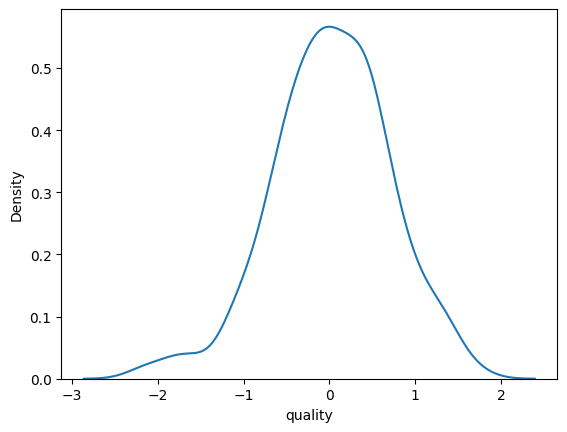

In [24]:
sns.kdeplot(residual)

#### 2) QQ-Plot

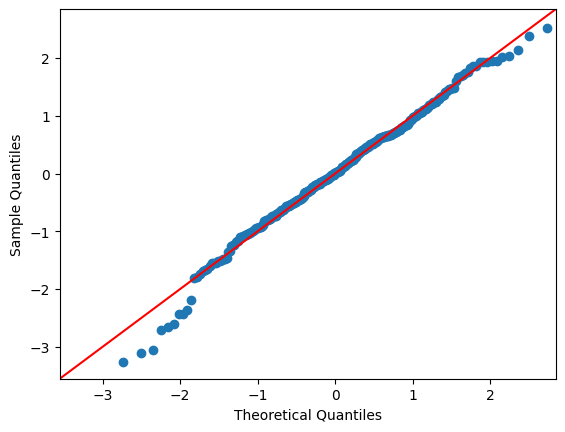

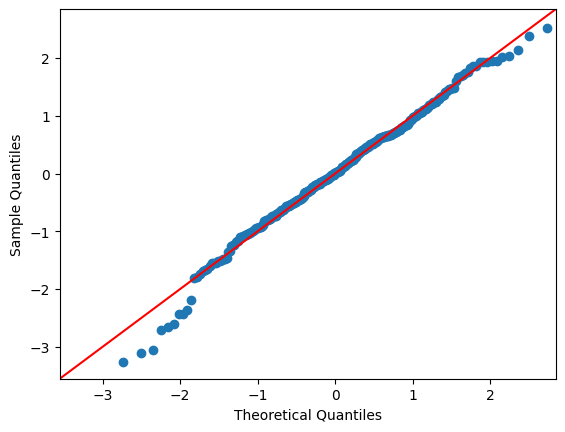

In [26]:
sm.qqplot(residual,line='45',fit=True)

#### 3) Hypothesis testing 

In [ ]:
Shapiro test

In [27]:
from scipy.stats import shapiro

In [30]:
_,p_val=shapiro(residual)
p_val

0.023258710280060768

#### 4) Skewness

In [31]:
from scipy.stats import skew

In [33]:
skew_val=skew(residual)
skew_val

-0.315289239063018

In [ ]:
As the skew value is between -0.5 to +0.5, it is normally distributed.

## Storing the model and data in file 

In [34]:
import pickle
import json

In [35]:
with open('linear_regression.pkl','wb') as f:
    pickle.dump(linear_reg, f)